# Colapse all simulation into a unique .feather file

In [1]:
import glob, os
import pandas as pd
import numpy as np
from scipy.stats import ecdf, wasserstein_distance

df_complete_file = 'df_complete_ex3.feather' # https://pandas.pydata.org/docs/user_guide/io.html#feather
if ( os.path.exists(df_complete_file) ):
    print(f'{df_complete_file} already exists. Reading it.')
    df_all = pd.read_feather(df_complete_file)
else:
    print(f'{df_complete_file} does not exists. Generating it.')
    data_files = glob.glob('../output_SA_ex3/SummaryFile_*.feather')
    df_all = pd.concat((pd.read_feather(file) for file in data_files), ignore_index=True)
    # Add the new column with parameter value to IC immune fraction
    df_all['IC_immune_frac'] = 1
    # Define the values to be assigned to samples 1-8 with diff IC proportions
    immune_frac_values = [0.99, 1.01, 0.95, 1.05, 0.9,1.1, 0.8, 1.2]
    # Assign the values to the corresponding samples
    for i, value in enumerate(immune_frac_values, start=1):
        df_all.loc[df_all['sample'] == i, 'IC_immune_frac'] = value
    # Save the dataframe to a feather file
    df_all.to_feather(df_complete_file)

params_list = ['phago_rate_apop', 'phago_rate_nec', 'mac_antinf_secretion_base',
       'attack_duration', 'cd8_migr_speed_base', 'damage_apop_sat',
       'damage_apop_hfm', 'damage_apop_hp', 'dead_debris_sat',
       'dead_debris_hfm', 'dead_debris_hp', 'mac_oxy_proinf_sat',
       'mac_oxy_proinf_hfm', 'mac_oxy_proinf_hp', 'mac_oxy_antinf_hfm',
       'mac_oxy_antinf_hp', 'cd8_antinf_attack_hfm', 'cd8_antinf_attack_hp',
       'cd8_proinf_attack_sat', 'cd8_proinf_attack_hfm',
       'cd8_proinf_attack_hp', 'cd8_antinf_speed_hfm', 'cd8_antinf_speed_hp',
       'cd8_contact_speed_hfm', 'cd8_contact_speed_hp', 'IC_immune_frac']

df_all # 252890 rows = 209 samples * 10 repplicates * 121 time points 

df_complete_ex3.feather does not exists. Generating it.


/tmp/ipykernel_2063/4094679223.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.99' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_all.loc[df_all['sample'] == i, 'IC_immune_frac'] = value


,time,replicate,sample,runtime,tumor_live,tumor_apop,tumor_nec,macrophage,CD8 T cell,dist_tumor_live,...,cd8_antinf_attack_hfm,cd8_antinf_attack_hp,cd8_proinf_attack_sat,cd8_proinf_attack_hfm,cd8_proinf_attack_hp,cd8_antinf_speed_hfm,cd8_antinf_speed_hp,cd8_contact_speed_hfm,cd8_contact_speed_hp,IC_immune_frac
0,0.0,4,107,0.000020,2000,0,0,100,100,"[358.0477958719171, 368.6989851084816, 234.545...",...,0.5,8.0,1.0,0.5,8.0,0.5,8.00,0.5,8.0,1.0
1,60.0,4,107,1.475843,2033,8,44,100,100,"[355.16957725645756, 368.5698984495574, 236.40...",...,0.5,8.0,1.0,0.5,8.0,0.5,8.00,0.5,8.0,1.0
2,120.0,4,107,2.937030,1992,9,98,100,100,"[355.86460944309357, 369.71805686326286, 232.1...",...,0.5,8.0,1.0,0.5,8.0,0.5,8.00,0.5,8.0,1.0
3,180.0,4,107,4.401384,1959,13,136,100,100,"[356.51606386094113, 370.78878927427206, 229.6...",...,0.5,8.0,1.0,0.5,8.0,0.5,8.00,0.5,8.0,1.0
4,240.0,4,107,5.874779,1933,18,173,100,100,"[356.6679818433615, 371.4661757015087, 227.939...",...,0.5,8.0,1.0,0.5,8.0,0.5,8.00,0.5,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252885,6960.0,8,185,137.477204,780,21,0,100,100,"[408.0463230513623, 442.5102587035708, 389.323...",...,0.5,8.0,1.0,0.5,8.0,0.5,7.92,0.5,8.0,1.0
252886,7020.0,8,185,138.524205,784,25,0,100,100,"[407.3665239500313, 442.4090940790859, 388.939...",...,0.5,8.0,1.0,0.5,8.0,0.5,7.92,0.5,8.0,1.0
252887,7080.0,8,185,139.576409,791,25,0,100,100,"[407.38948659632456, 443.9188603650407, 388.51...",...,0.5,8.0,1.0,0.5,8.0,0.5,7.92,0.5,8.0,1.0
252888,7140.0,8,185,140.632262,802,23,0,100,100,"[408.2742629158863, 442.92683714909106, 388.22...",...,0.5,8.0,1.0,0.5,8.0,0.5,7.92,0.5,8.0,1.0


# Define the QoIs: AUC of tumor mean population, distribution of cell distance from the center at the last time

- Population: store the population of each cell type over time.
    - Summary over time and replicates: Area under curve (AUC) of the average populations.
- Invasion: Distance of cells from the center - provides insights into the spatial distribution and invasion characteristics of the cells.
    - Summary over time and replicates: Pool the distances from replicates and calculate the Wassertein distance between tumor and CD8, and tumor and macrophages.


In [2]:
df_summary_file = 'df_summary_ex3.feather' # https://pandas.pydata.org/docs/user_guide/io.html#feather
if ( os.path.exists(df_summary_file) ):
    print(f'{df_summary_file} already exists. Reading it.')
    df_summary = pd.read_feather(df_summary_file)
else:
    print(f'{df_summary_file} does not exists. Generating it.')

    # Exclude columns with numpy arrays before calculating the mean
    exclude_cols = ['IC_file','dist_tumor_live', 'dist_tumor_apop', 'dist_tumor_nec', 'dist_mac', 'dist_cd8']
    df_summary_temp = df_all.drop(columns=exclude_cols).groupby(['sample', 'time'], as_index=False).mean()
    df_summary_temp = df_summary_temp.drop(columns=['replicate'])
    
    # Replace the mean of distributions to concatenate each replicate samples - row dimension of samples x time points
    for col in exclude_cols:
        if col == 'IC_file': continue
        concatenated = df_all.groupby(['sample', 'time'])[col].apply(
            lambda x: np.concatenate([y for y in x if y.size > 0 and y.ndim > 0]) if any(y.size > 0 and y.ndim > 0 for y in x) else np.array([])
        ).reset_index(drop=True)
        df_summary_temp[col] = concatenated
    # Concatenate the colums of dist_tumor_live and dist_tumor_dead named as dist_tumor
    df_summary_temp['dist_tumor'] = df_summary_temp.apply( lambda row: np.concatenate((row['dist_tumor_live'], row['dist_tumor_apop'], row['dist_tumor_nec'])), axis=1 )
    df_summary_temp = df_summary_temp.drop(columns=['dist_tumor_live', 'dist_tumor_apop', 'dist_tumor_nec'])

    # Function to calculate AUC using trapezoidal rule for trajectories
    def calculate_auc_multiple(group):
        auc_values = {}
        for col in ['tumor_live', 'tumor_apop', 'tumor_nec']: # QoI columns of cell population  
            mask_notna = group[col].notna()  
            auc_values[f'AUC_{col}'] = np.trapezoid(group[col][mask_notna], group['time'][mask_notna])
        return pd.Series(auc_values)
    # Group by 'Sample_ID' then calculate AUC for each QOI - row dimension of samples
    df_auc = df_summary_temp.groupby(['sample']).apply(calculate_auc_multiple).reset_index() # calculate the AUC for each QOI
    
    # Function to calculate Wasserstein distance between tumor and motile cells 
    def calculate_wassertein_dist(group):
        wasserstein_values = {}
        # Define empirical distributions of tumor and motile cells
        emp_Tumor_cdf = ecdf(group['dist_tumor'].values[0])
        emp_Mac_cdf = ecdf(group['dist_mac'].values[0])
        emp_CD8_cdf = ecdf(group['dist_cd8'].values[0])
        # print(group['dist_tumor'].values[0].shape, group['dist_mac'].values[0].shape, group['dist_cd8'].values[0].shape)
        wasserstein_values['Wasserstein_dist_Mac'] = wasserstein_distance(emp_Tumor_cdf.cdf.quantiles, emp_Mac_cdf.cdf.quantiles, emp_Tumor_cdf.cdf.probabilities, emp_Mac_cdf.cdf.probabilities)
        wasserstein_values['Wasserstein_dist_CD8'] = wasserstein_distance(emp_Tumor_cdf.cdf.quantiles, emp_CD8_cdf.cdf.quantiles, emp_Tumor_cdf.cdf.probabilities, emp_CD8_cdf.cdf.probabilities)
        return pd.DataFrame(wasserstein_values, index=[0])
    # Group by 'Sample_ID' then calculate Wasserstein distance between tumor and motile cells - row dimension of samples
    df_distance = df_summary_temp[ df_summary_temp['time'] == 7200.0 ].groupby(['sample']).apply(calculate_wassertein_dist).reset_index()

    # Merge the AUC values and Wasserstein distance to the summary dataframe
    df_summary = df_auc.merge(df_distance, on=['sample'])
    
    # Merge the parameters to the summary dataframe
    df_summary = df_summary.merge(df_summary_temp[ df_summary_temp['time'] == 7200.0 ][['sample']+ params_list], on=['sample'])


    df_summary.to_feather(df_summary_file)

df_summary

df_summary_ex3.feather does not exists. Generating it.


/tmp/ipykernel_2063/1945324882.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_auc = df_summary_temp.groupby(['sample']).apply(calculate_auc_multiple).reset_index() # calculate the AUC for each QOI
/tmp/ipykernel_2063/1945324882.py:46: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_distance = df_summary_temp[ df_summary_temp['time'] == 7200.0 ].groupby(['sample']).apply(calculate_wassertein_dist).

,sample,AUC_tumor_live,AUC_tumor_apop,AUC_tumor_nec,level_1,Wasserstein_dist_Mac,Wasserstein_dist_CD8,phago_rate_apop,phago_rate_nec,mac_antinf_secretion_base,...,cd8_antinf_attack_hfm,cd8_antinf_attack_hp,cd8_proinf_attack_sat,cd8_proinf_attack_hfm,cd8_proinf_attack_hp,cd8_antinf_speed_hfm,cd8_antinf_speed_hp,cd8_contact_speed_hfm,cd8_contact_speed_hp,IC_immune_frac
0,0,6705909.0,338649.0,1559958.0,0,120.353335,220.697058,0.1,0.017,10.0,...,0.5,8.0,1.0,0.5,8.0,0.5,8.0,0.5,8.0,1.00
1,1,6714348.0,329511.0,1536687.0,0,117.753486,209.609403,0.1,0.017,10.0,...,0.5,8.0,1.0,0.5,8.0,0.5,8.0,0.5,8.0,0.99
2,2,6814764.0,331635.0,1547763.0,0,117.588263,219.207742,0.1,0.017,10.0,...,0.5,8.0,1.0,0.5,8.0,0.5,8.0,0.5,8.0,1.01
3,3,7007265.0,339615.0,1536255.0,0,114.614372,202.551027,0.1,0.017,10.0,...,0.5,8.0,1.0,0.5,8.0,0.5,8.0,0.5,8.0,0.95
4,4,6723822.0,323328.0,1547901.0,0,111.632925,206.176478,0.1,0.017,10.0,...,0.5,8.0,1.0,0.5,8.0,0.5,8.0,0.5,8.0,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,204,6733563.0,320136.0,1545426.0,0,119.340340,201.448089,0.1,0.017,10.0,...,0.5,8.0,1.0,0.5,8.0,0.5,8.0,0.5,8.4,1.00
205,205,6327156.0,309393.0,1554654.0,0,110.875391,223.700630,0.1,0.017,10.0,...,0.5,8.0,1.0,0.5,8.0,0.5,8.0,0.5,7.2,1.00
206,206,6955878.0,337536.0,1578612.0,0,115.419695,219.900997,0.1,0.017,10.0,...,0.5,8.0,1.0,0.5,8.0,0.5,8.0,0.5,8.8,1.00
207,207,6528447.0,314406.0,1503630.0,0,116.624848,211.412839,0.1,0.017,10.0,...,0.5,8.0,1.0,0.5,8.0,0.5,8.0,0.5,6.4,1.00


# Local sensitivity analysis: 
Give $\theta^\star$ as the reference parameter set, we added a multiplicative perturbation $\delta$, which
$$\theta_i = \theta^\star \times (1\pm \delta), \quad \delta = \{0.01, 0.05, 0.1, 0.2\}$$

Absolute sensitivity (A unit increase in $\theta_i$ changes the output by $S_{\theta_i}$ units): 
$$S_{\theta_i} = \dfrac{f(\theta_i)-f(\theta^\star)}{\theta_i - \theta^\star}$$
Relative sensitivity (Elasticity -  For every $1\%$ change in $\theta_i$, the output changes by $\bar{S}_{\theta_i} \times 1\%$:

$$\bar{S}_{\theta_i} = \dfrac{f(\theta_i)-f(\theta^\star)}{f(\theta^\star)}\cdot \dfrac{\theta^\star}{\theta_i - \theta^\star}$$

- $S>0:$ As the parameter increases, the output also increases.
- $S<0:$ As the parameter increases, the output decreases.
- $S=0:$ The output is insensitive to changes in the parameter.
- $∣S∣≫1:$ The output is highly sensitive to the parameter; small changes in the parameter will cause large changes in the output.
- $∣S∣≪1:$ The output is relatively insensitive to the parameter; large changes in the parameter will have little effect on the output.

In [3]:
sample_ref = 0 # Sample with reference parameters
print('Sample with reference parameters: ', df_summary.iloc[sample_ref][params_list].values)

# Calculate the sensitivity index
QoIs_list = ['AUC_tumor_live', 'AUC_tumor_apop', 'AUC_tumor_nec', 'Wasserstein_dist_Mac', 'Wasserstein_dist_CD8']
# Function to calculate SI using
def calculate_SI_multiple():
    sensitivity_analysis_dic = {}
    # Calculate the delta of parameters
    non_zero_values = []; non_zero_params= []
    relative_change_params = (df_summary[params_list] - df_summary.iloc[sample_ref][params_list].values) / np.where(df_summary.iloc[sample_ref][params_list].values != 0, df_summary.iloc[sample_ref][params_list].values, 1)
    for index, row in relative_change_params.iterrows():
        # First index is the reference sample - include the value 1 and skip it
        if index == sample_ref: non_zero_values.append(1); non_zero_params.append(params_list[0]); continue
        # Get the non-zero values in the row
        non_zero_row_values = row[row != 0.0]
        # Check if there is exactly one non-zero value
        if len(non_zero_row_values) == 1: non_zero_values.append(non_zero_row_values.iloc[0])
        else: raise ValueError(f"Row {index} contains more than one non-zero value or all values are zero. Non zero: {non_zero_row_values} - Row: {row.values}")
        # Parameter name with non-zero value
        non_zero_params.append(non_zero_row_values.index[0])
    relative_change_params_1d = pd.DataFrame(non_zero_values, columns=['NonZeroValues'])
    sensitivity_analysis_dic['SA_parameter'] = np.array(non_zero_params)
    sensitivity_analysis_dic['SA_delta'] = relative_change_params_1d.to_numpy()[:,0].round(2)
    # Calculate the delta of QoIs
    absolute_change_qois = df_summary[QoIs_list] - df_summary.iloc[sample_ref][QoIs_list].values
    relative_change_qois = absolute_change_qois / np.where(df_summary.iloc[sample_ref][QoIs_list].values != 0, df_summary.iloc[sample_ref][QoIs_list].values, 1)
    absolute_change_params = sensitivity_analysis_dic['SA_delta'] * df_summary.iloc[sample_ref][ sensitivity_analysis_dic['SA_parameter'] ].to_numpy()
    for id_qoi, qoi in enumerate(QoIs_list): 
        sensitivity_analysis_dic[f'SI_{qoi}'] = relative_change_qois.to_numpy()[:,id_qoi]/sensitivity_analysis_dic['SA_delta']
        parameter_name = sensitivity_analysis_dic['SA_parameter']
        sensitivity_analysis_dic[f'Abs_SI_{qoi}'] = absolute_change_qois.to_numpy()[:,id_qoi]/absolute_change_params
    
    # Change the delta of reference value to 0 and label it as reference
    sensitivity_analysis_dic['SA_delta'][0] = 0
    sensitivity_analysis_dic['SA_parameter'][0] = 'Reference'
    return pd.DataFrame(sensitivity_analysis_dic)

# Group by 'Sample_ID' then calculate AUC for each QOI - row dimension of samples
df_SA = calculate_SI_multiple() # calculate the AUC for each QOI
df_SA = pd.concat([df_summary['sample'], df_SA], axis=1)

# Print the sensitivity index
for qoi in QoIs_list:
    sample_lowest_qoi = df_summary.iloc[df_summary[qoi].idxmin()]['sample']; sample_highest_qoi = df_summary.iloc[df_summary[qoi].idxmax()]['sample']
    sample_lowest_si = df_SA.iloc[df_SA[f'SI_{qoi}'].idxmin()]['sample']; sample_highest_si = df_SA.iloc[df_SA[f'SI_{qoi}'].idxmax()]['sample']
    print(f"QoI: {qoi}")
    print(f"\t lowest and highest QoI: {sample_lowest_qoi} ({df_SA.iloc[int(sample_lowest_qoi)]['SA_parameter']}) and {sample_highest_qoi} ({df_SA.iloc[int(sample_highest_qoi)]['SA_parameter']})")
    print(f"\t lowest and highest SI: {sample_lowest_si} ({df_SA.iloc[int(sample_lowest_si)]['SA_parameter']}) and {sample_highest_si} ({df_SA.iloc[int(sample_highest_si)]['SA_parameter']})\n")
df_SA

Sample with reference parameters:  [1.0e-01 1.7e-02 1.0e+01 1.5e+01 1.0e+00 2.3e-02 4.5e+01 1.6e+01 1.7e-02
 1.0e-01 1.0e+01 1.0e+01 5.0e+00 4.0e+00 5.0e+00 4.0e+00 5.0e-01 8.0e+00
 1.0e+00 5.0e-01 8.0e+00 5.0e-01 8.0e+00 5.0e-01 8.0e+00 1.0e+00]
QoI: AUC_tumor_live
	 lowest and highest QoI: 48.0 (cd8_migr_speed_base) and 47.0 (cd8_migr_speed_base)
	 lowest and highest SI: 10 (phago_rate_apop) and 129 (mac_oxy_antinf_hp)

QoI: AUC_tumor_apop
	 lowest and highest QoI: 205.0 (cd8_contact_speed_hp) and 75.0 (dead_debris_sat)
	 lowest and highest SI: 82 (dead_debris_hfm) and 73 (dead_debris_sat)

QoI: AUC_tumor_nec
	 lowest and highest QoI: 48.0 (cd8_migr_speed_base) and 47.0 (cd8_migr_speed_base)
	 lowest and highest SI: 74 (dead_debris_sat) and 145 (cd8_antinf_attack_hp)

QoI: Wasserstein_dist_Mac
	 lowest and highest QoI: 144.0 (cd8_antinf_attack_hfm) and 83.0 (dead_debris_hfm)
	 lowest and highest SI: 66 (damage_apop_hp) and 97 (mac_oxy_proinf_sat)

QoI: Wasserstein_dist_CD8
	 lowest a

,sample,SA_parameter,SA_delta,SI_AUC_tumor_live,Abs_SI_AUC_tumor_live,SI_AUC_tumor_apop,Abs_SI_AUC_tumor_apop,SI_AUC_tumor_nec,Abs_SI_AUC_tumor_nec,SI_Wasserstein_dist_Mac,Abs_SI_Wasserstein_dist_Mac,SI_Wasserstein_dist_CD8,Abs_SI_Wasserstein_dist_CD8
0,0,Reference,0.00,0.000000,0.000000e+00,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,1,IC_immune_frac,-0.01,-0.125844,-8.439000e+05,2.698369,913800.000,1.491771,2327100.0,2.160180,259.984853,5.023925,1108.765466
2,2,IC_immune_frac,0.01,1.623270,1.088550e+07,-2.071171,-701400.000,-0.781752,-1219500.0,-2.297462,-276.507193,-0.674824,-148.931583
3,3,IC_immune_frac,-0.05,-0.898777,-6.027120e+06,-0.057050,-19320.000,0.303893,474060.0,0.953686,114.779259,1.644429,362.920619
4,4,IC_immune_frac,0.05,0.053425,3.582600e+05,-0.904831,-306420.000,-0.154581,-241140.0,-1.449135,-174.408205,-1.315883,-290.411598
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,204,cd8_contact_speed_hp,0.05,0.082477,6.913500e+04,-1.093344,-46282.500,-0.186313,-36330.0,-0.168337,-2.532488,-1.744379,-48.122423
205,205,cd8_contact_speed_hp,-0.10,0.564805,4.734412e+05,0.863903,36570.000,0.034001,6630.0,0.787510,11.847429,-0.136095,-3.754464
206,206,cd8_contact_speed_hp,0.10,0.372759,3.124612e+05,-0.032866,-1391.250,0.119580,23317.5,-0.409930,-6.167050,-0.036070,-0.995076
207,207,cd8_contact_speed_hp,-0.20,0.132318,1.109138e+05,0.357937,15151.875,0.180543,35205.0,0.154898,2.330304,0.210339,5.802637


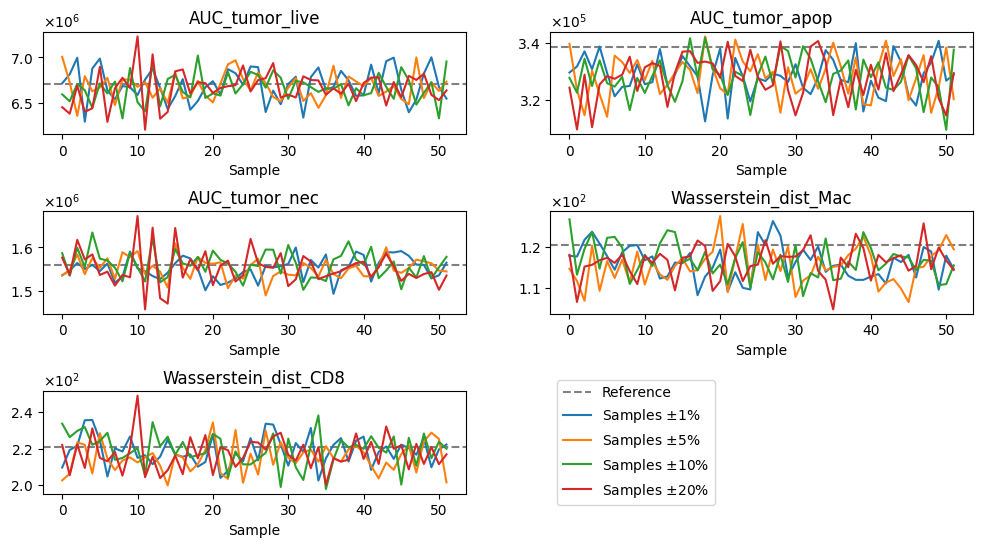

In [4]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 2, figsize=(12, 6))
plt.subplots_adjust(hspace=0.75)
for qoi, ax in zip(QoIs_list, axes.flatten()):
    ax.axhline(df_summary.iloc[sample_ref][qoi], color='gray', linestyle='--')
    samples_delta1 = df_SA[ (df_SA['SA_delta'] == -0.01) | (df_SA['SA_delta'] == 0.01) ]['sample'].values
    samples_delta5 = df_SA[ (df_SA['SA_delta'] == -0.05) | (df_SA['SA_delta'] == 0.05) ]['sample'].values
    samples_delta10 = df_SA[ (df_SA['SA_delta'] == -0.1) | (df_SA['SA_delta'] == 0.1) ]['sample'].values
    samples_delta20 = df_SA[( df_SA['SA_delta'] == -0.2) | (df_SA['SA_delta'] == 0.2) ]['sample'].values
    ax.plot(range(len(df_summary.iloc[samples_delta1]['sample'])), df_summary.iloc[samples_delta1][qoi])#, s=12)
    ax.plot(range(len(df_summary.iloc[samples_delta5]['sample'])), df_summary.iloc[samples_delta5][qoi])#, s=12)
    ax.plot(range(len(df_summary.iloc[samples_delta10]['sample'])), df_summary.iloc[samples_delta10][qoi])#, s=12)
    ax.plot(range(len(df_summary.iloc[samples_delta20]['sample'])), df_summary.iloc[samples_delta20][qoi])#, s=12)
    ax.set_title(qoi)
    ax.set_xlabel('Sample')
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.yaxis.major.formatter._useMathText = True
axes[2, 1].remove()
plt.legend(labels=['Reference', r'Samples $\pm 1\%$', r'Samples $\pm 5\%$', r'Samples $\pm 10\%$', r'Samples $\pm 20\%$'],loc='center left', bbox_to_anchor=(1.2, 0.5))


plt.show()

/tmp/ipykernel_2063/1058788702.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_SA['SA_delta'] = df_SA['SA_delta'].round(2)


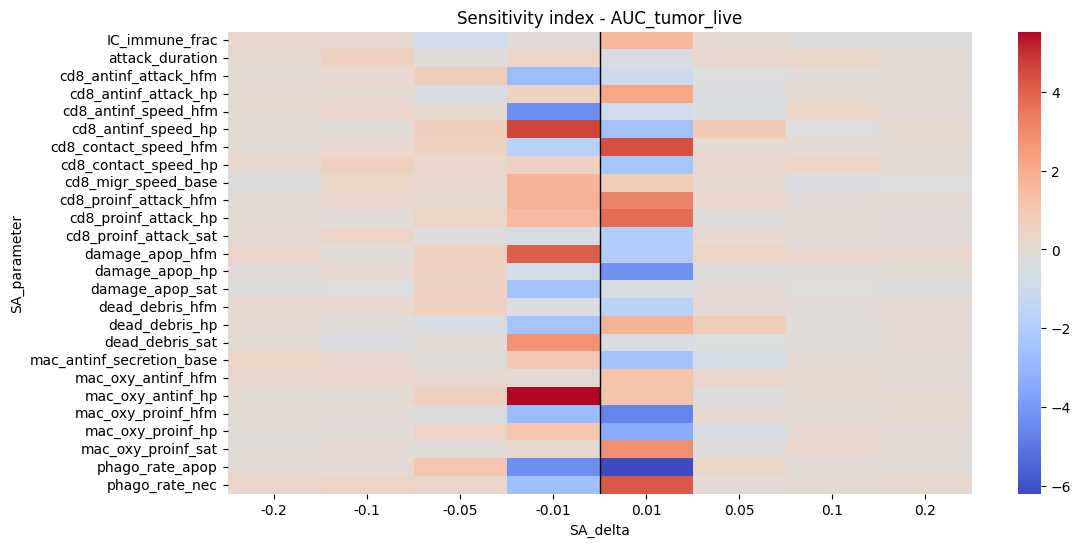

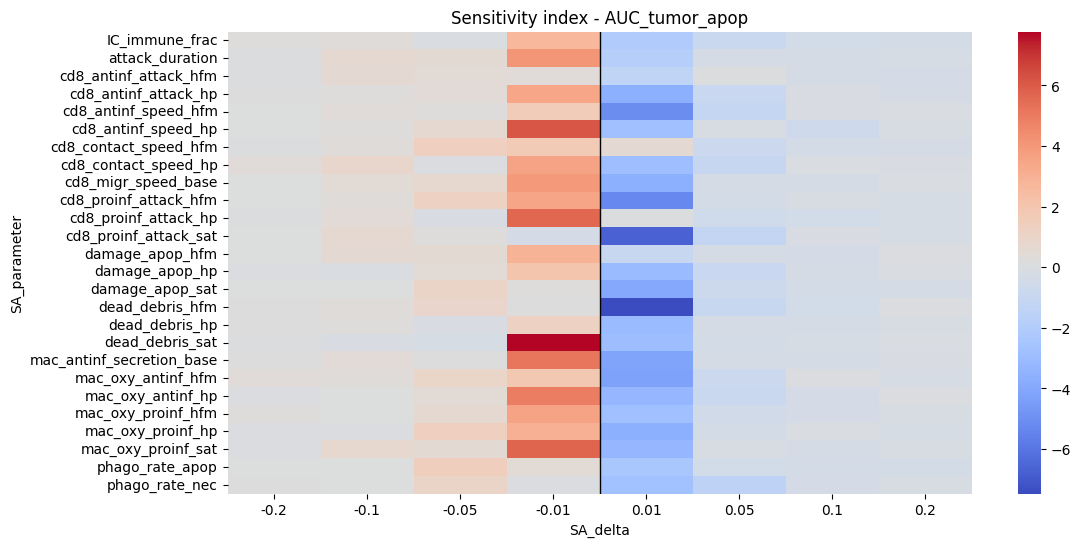

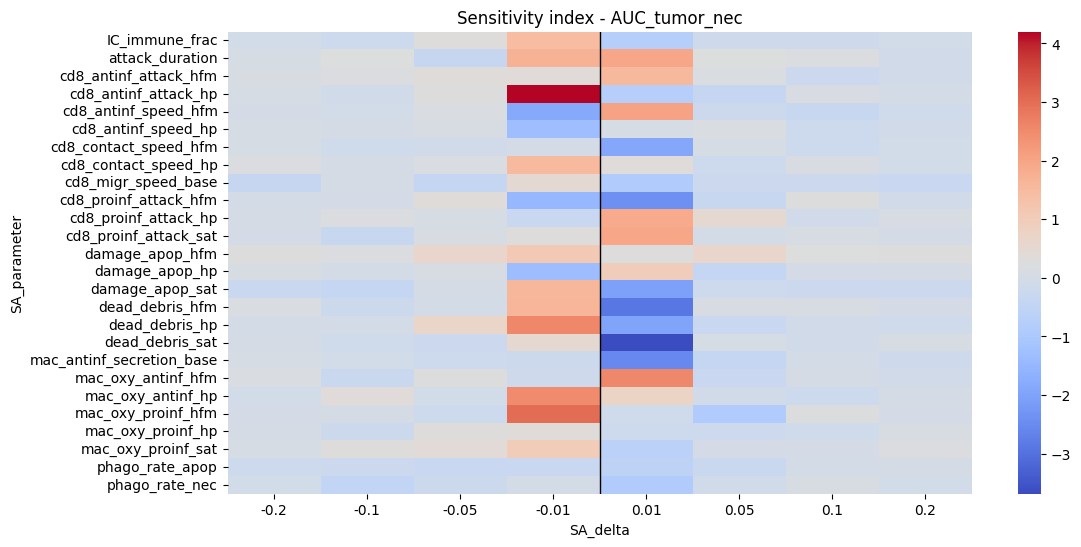

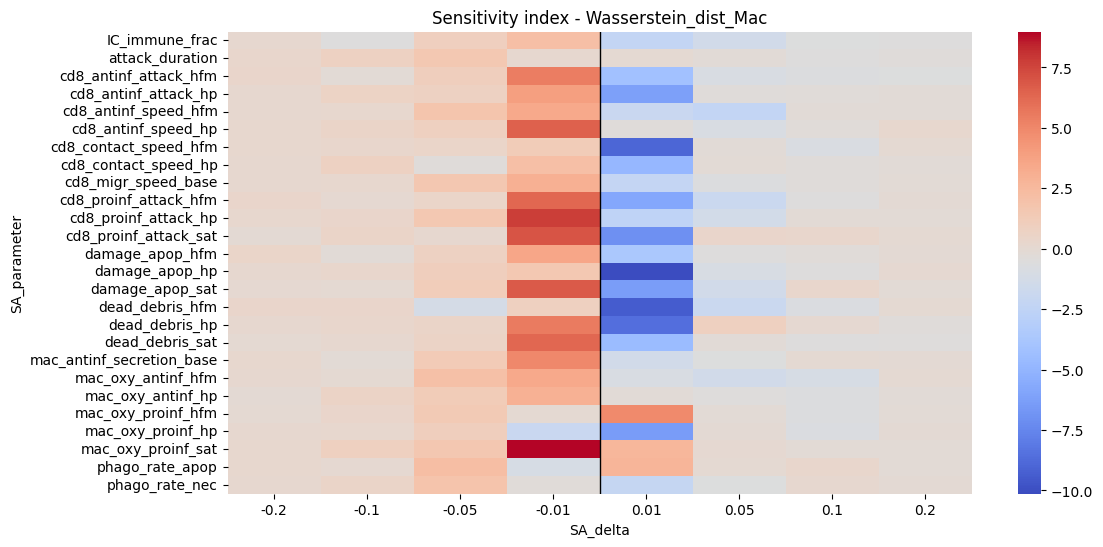

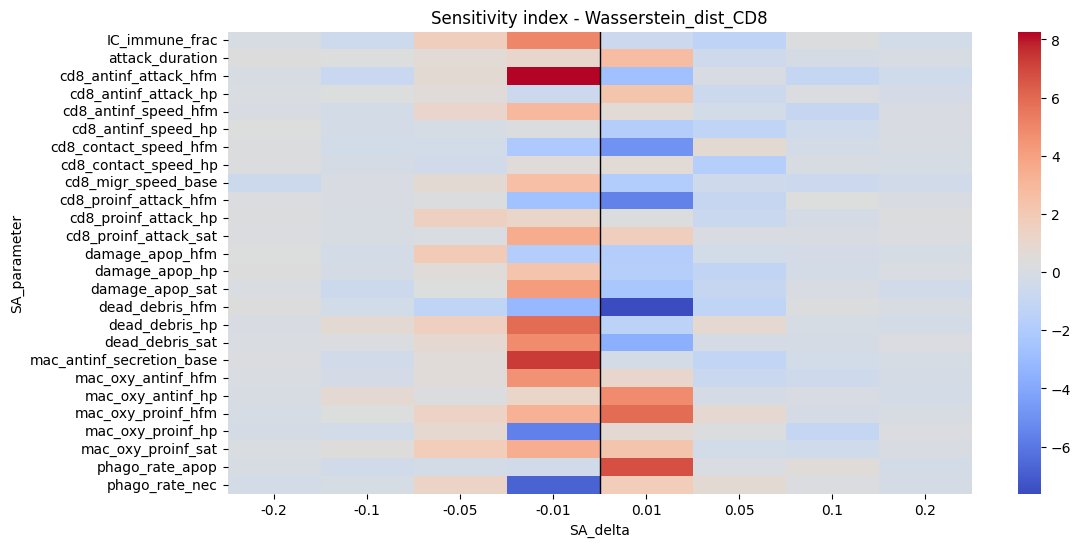

In [5]:
# Plot the sensitivity index as heatmap with the parameters vs delta and color as SI
import seaborn as sns

for qoi in QoIs_list:
    fig, ax = plt.subplots(figsize=(12, 6))
    # Round the values to 2 decimal places
    df_SA['SA_delta'] = df_SA['SA_delta'].round(2)
    # Drop the reference sample
    df_SA = df_SA[df_SA['sample'] != sample_ref]
    df_SA_pivot = df_SA.pivot(index="SA_parameter", columns="SA_delta", values="SI_"+qoi)
    sns.heatmap(df_SA_pivot, cmap='coolwarm', ax=ax)
    # draw a line to separate the positive and negative values
    ax.axvline(4, color='black', lw=1)
    ax.set_title(f'Sensitivity index - {qoi}')
plt.show()

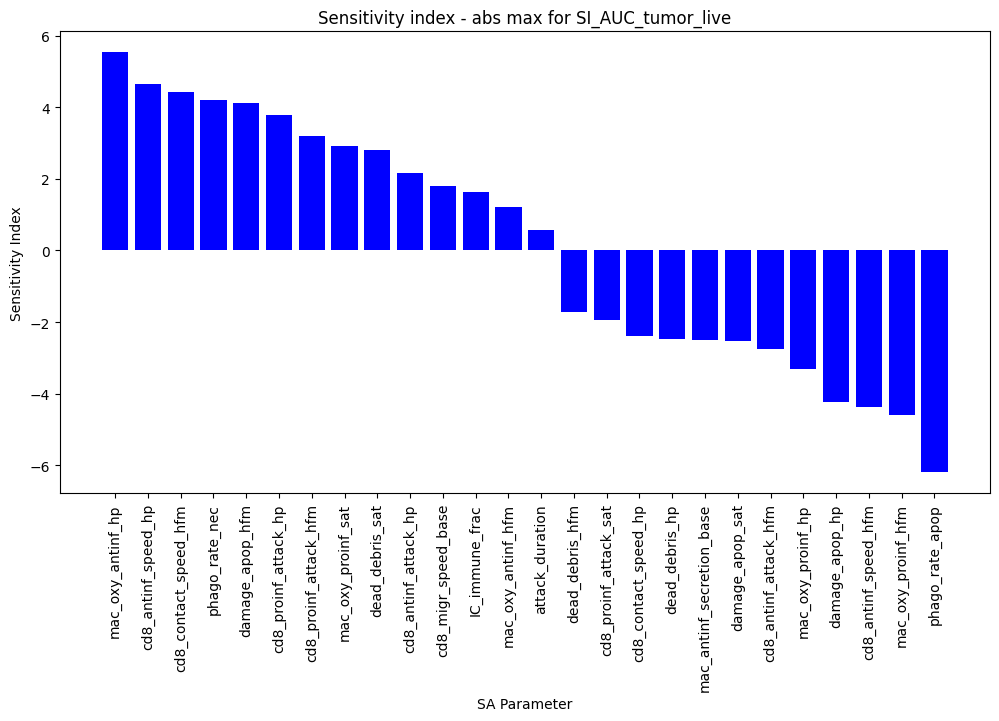

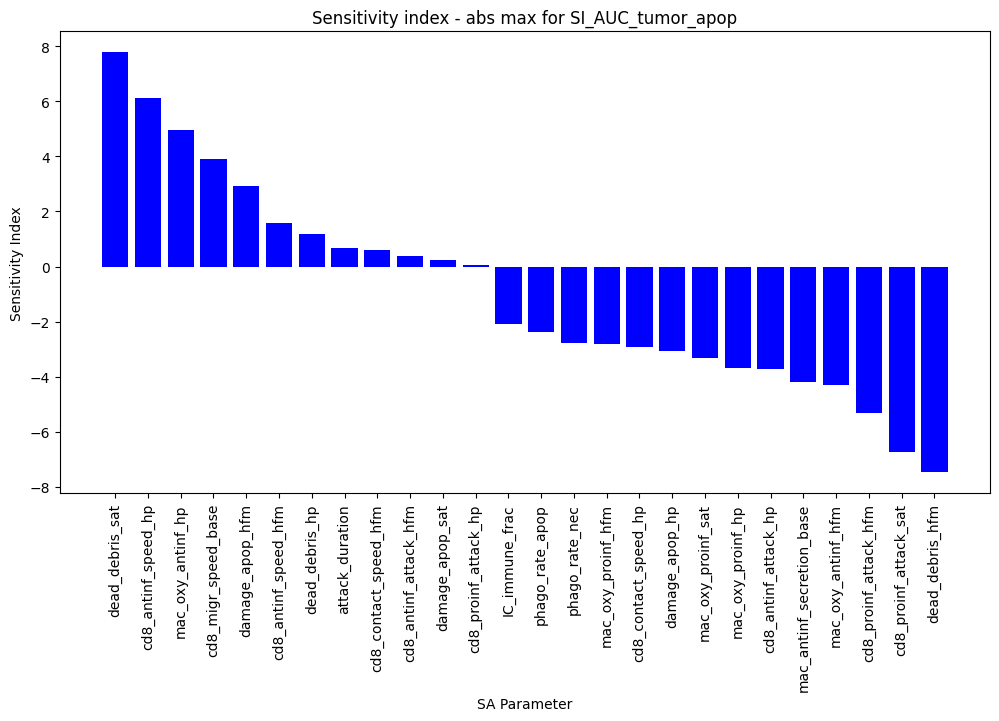

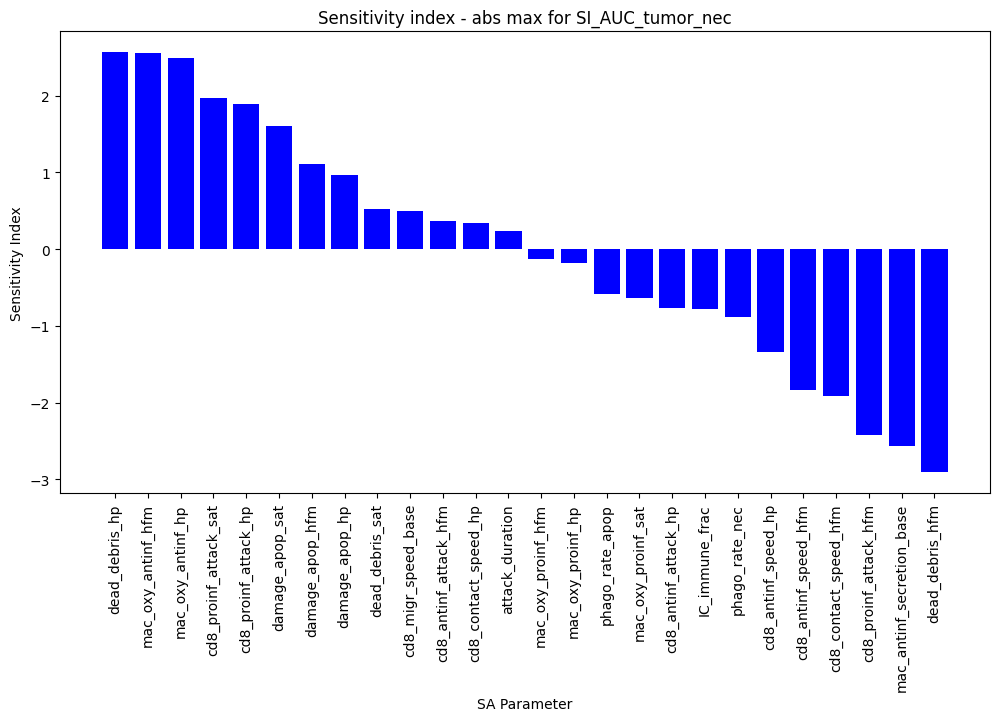

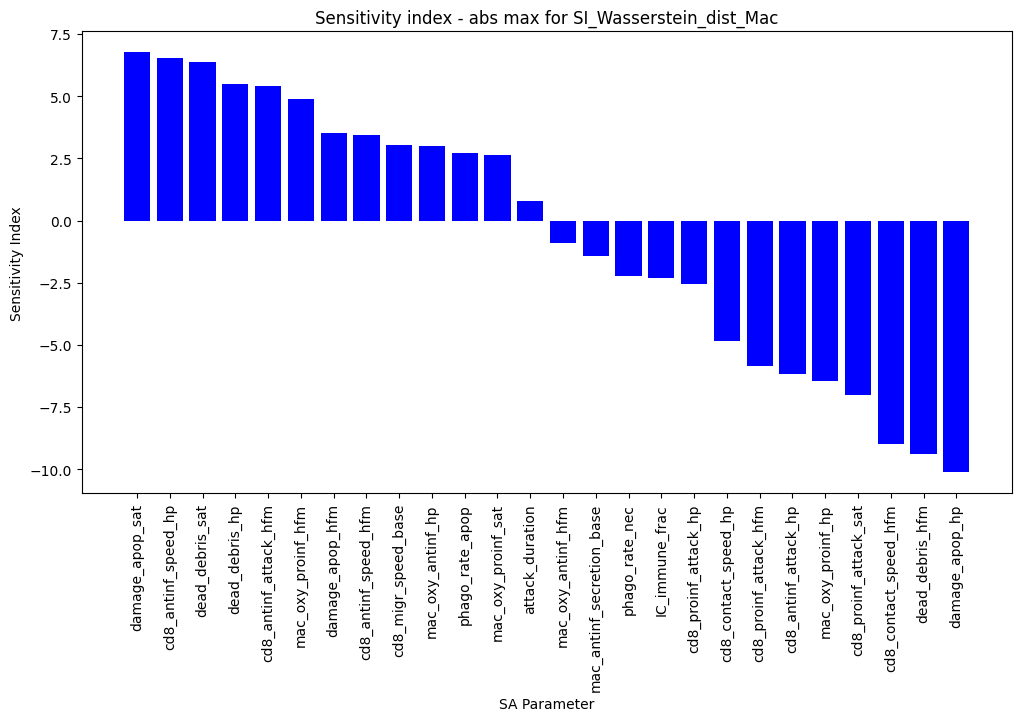

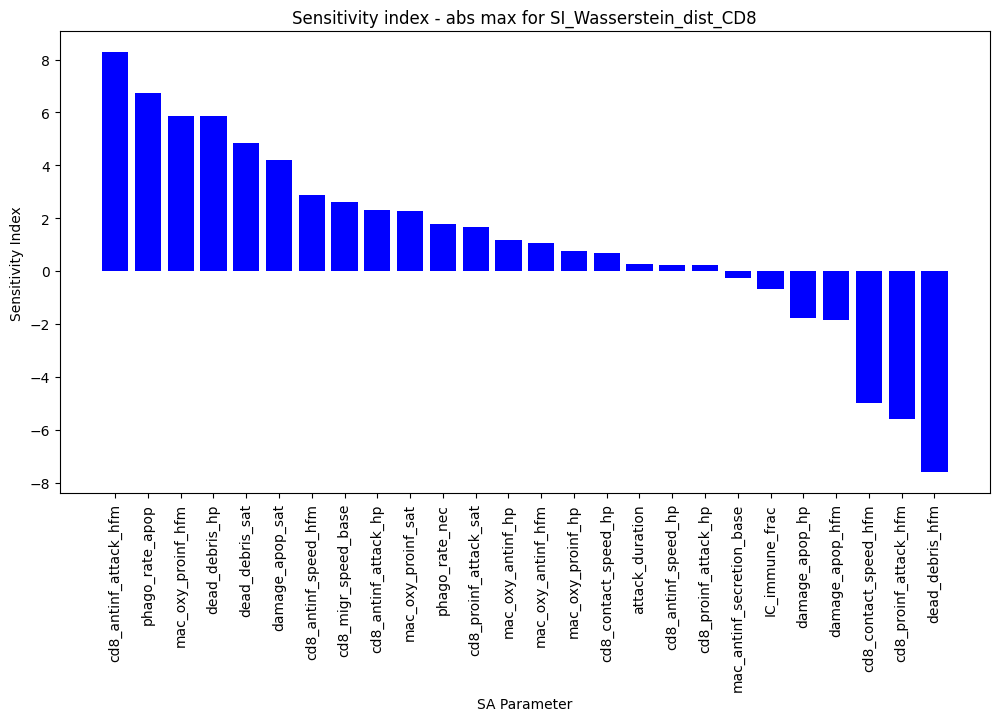

In [6]:
SI_list = [f'SI_{qoi}' for qoi in QoIs_list]

# Round the values to 2 decimal places
df_SA['SA_delta'] = df_SA['SA_delta'].round(2)
# Drop the reference sample
df_SA = df_SA[df_SA['sample'] != sample_ref]
# Calculate the absolute max sensitivity index for each parameter across all SA_delta
df_SA_max = df_SA.groupby(['SA_parameter'])[SI_list].apply(lambda x: x.loc[x.abs().idxmax(axis=0).iloc[0]]).reset_index()

# Pivot the dataframe to get the desired format
# Create a bar plot for each QoI
for qoi in SI_list:
    fig, ax = plt.subplots(figsize=(12, 6))
    df_SA_max_sorted = df_SA_max.sort_values(by=qoi, ascending=False)
    ax.bar(df_SA_max_sorted['SA_parameter'], df_SA_max_sorted[qoi], color='b')
    ax.set_title(f'Sensitivity index - abs max for {qoi}')
    ax.set_xlabel('SA Parameter')
    ax.set_ylabel('Sensitivity Index')
    plt.xticks(rotation=90)
    plt.show()

# Plot one figure with the abs max sensitivity index as heatmap with the parameters vs QOI and color as SI
# fig, ax = plt.subplots(figsize=(12, 6))
# df_SA_pivot = df_SA_max.pivot(index="SA_parameter", columns="SA_delta", values=SI_list)
# sns.heatmap(df_SA_pivot, cmap='coolwarm', ax=ax)
# ax.set_title('Sensitivity index - abs max')
# plt.show()